1. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2.Reading the dataset

In [2]:
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

DATA INFORMATION

In [3]:
print(customers.info())
print(products.info())
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

MERGING DATASETS

In [19]:
transactions_customers = pd.merge(transactions, customers, on='CustomerID', how='inner')
data = pd.merge(transactions_customers, products, on='ProductID', how='inner')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB
None


Checking the Null values

In [5]:
data.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price_x,0
CustomerName,0
Region,0
SignupDate,0


In [6]:
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")


Number of rows: 1000
Number of columns: 13


In [7]:
print("Data types and missing values:")
display(data.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


None

In [8]:
print("Missing values:")
display(data.isnull().sum())
data = data.dropna()


Missing values:


,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price_x,0
CustomerName,0
Region,0
SignupDate,0


In [9]:
print(f"Number of duplicate rows: {data.duplicated().sum()}")
data = data.drop_duplicates()


Number of duplicate rows: 0


In [10]:
print("Descriptive statistics:")
display(data.describe())


Descriptive statistics:


,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


DISTRIBUTION PLOT

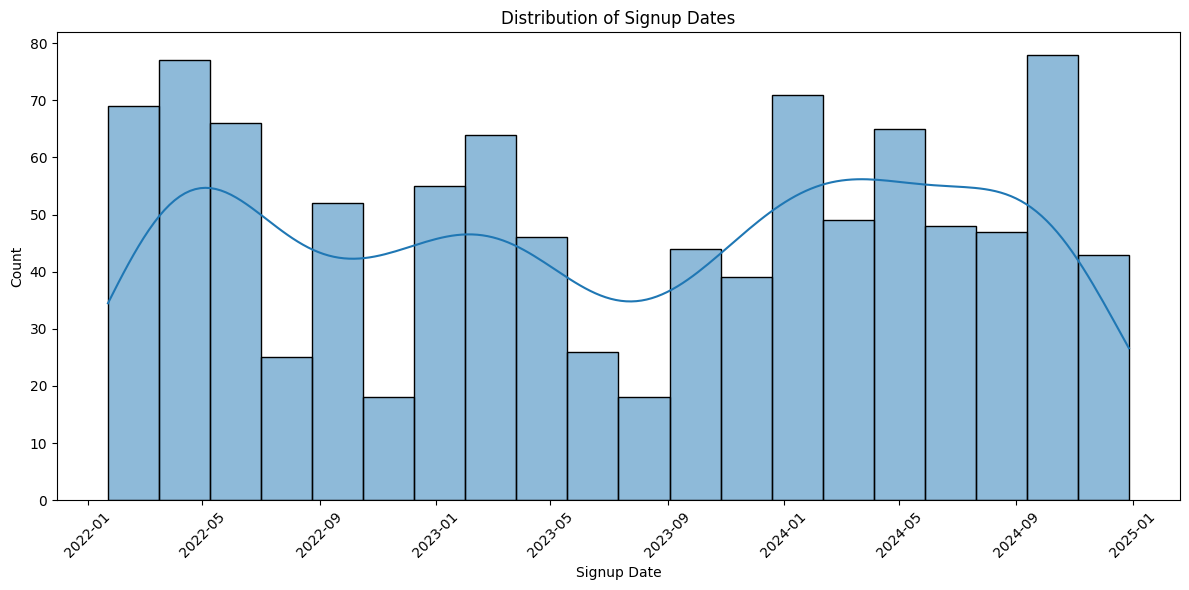

In [11]:
data['SignupDate'] = pd.to_datetime(data['SignupDate'])
plt.figure(figsize=(12, 6))
sns.histplot(data['SignupDate'], bins=20, kde=True)
plt.title('Distribution of Signup Dates')
plt.xlabel('Signup Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

BOX PLOT

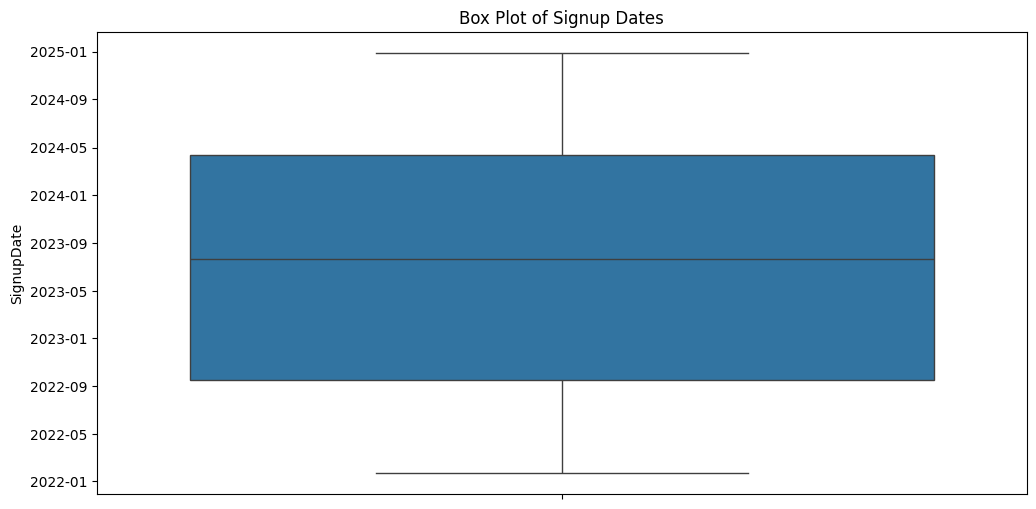

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data['SignupDate'])
plt.title('Box Plot of Signup Dates')
plt.show()


BAR PLOT

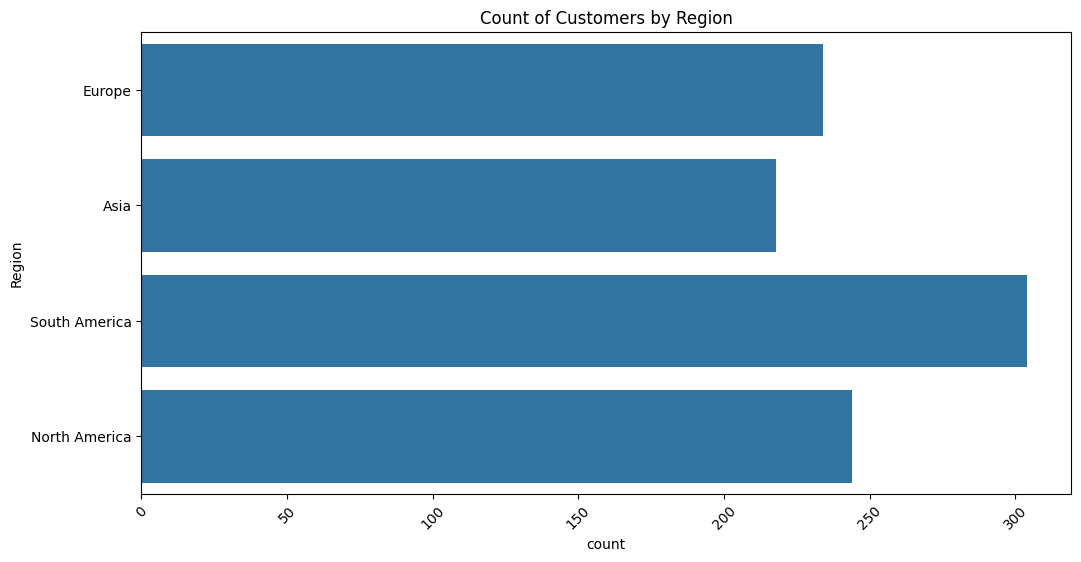

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data['Region'])
plt.title('Count of Customers by Region')
plt.xticks(rotation=45)
plt.show()


In [14]:
print("Frequency distribution of Region:")
display(data['Region'].value_counts())


Frequency distribution of Region:


,count
Region,
South America,304
North America,244
Europe,234
Asia,218


In [15]:
grouped_data = data.groupby('Region').agg({'SignupDate': ['count', 'min', 'max']})
print("Grouped data by Region:")
display(grouped_data)


Grouped data by Region:


SignupDate                      
                   count        min        max
Region                                        
Asia                 218 2022-02-13 2024-11-13
Europe               234 2022-02-13 2024-12-28
North America        244 2022-02-02 2024-11-22
South America        304 2022-01-22 2024-11-22

<ipython-input-16-b6d4a8cbe793>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['CustomerID'].resample('M').count().plot()


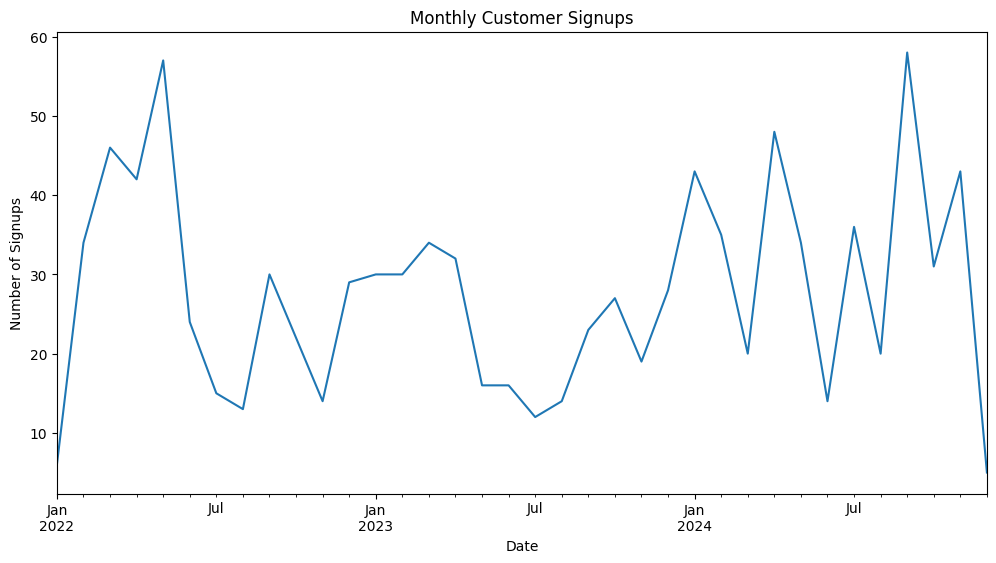

In [16]:
# Convert SignupDate to datetime if it's not already the index
if 'SignupDate' in data.columns:
    data['SignupDate'] = pd.to_datetime(data['SignupDate'])

# Set SignupDate as index if it's not already the index
if 'SignupDate' in data.columns:
    data.set_index('SignupDate', inplace=True)

# Plot time series
plt.figure(figsize=(12, 6))
data['CustomerID'].resample('M').count().plot()
plt.title('Monthly Customer Signups')
plt.xlabel('Date')
plt.ylabel('Number of Signups')
plt.show()

In [17]:
data.to_csv('cleaned_customers.csv', index=False)
print("Cleaned data exported successfully!")


Cleaned data exported successfully!


In [18]:
print("Key Insights:")
print(f"1. Total number of customers: {data.shape[0]}")
print(f"2. Most common region: {data['Region'].mode()[0]}")
print(f"3. Earliest signup date: {data.index.min()}")
print(f"4. Latest signup date: {data.index.max()}")


Key Insights:
1. Total number of customers: 1000
2. Most common region: South America
3. Earliest signup date: 2022-01-22 00:00:00
4. Latest signup date: 2024-12-28 00:00:00
